# Quadratic Discriminant Analysis

Suppose our target variable $Y$ is a categorical variable with $C$ distinct classes labeled $\{1,2,...C\}$ and that the class conditional densities

$$ P(x | Y=k) = \frac{1}{(2\pi)^{D/2}|\Sigma_k|^{1/2}} \text{exp}\left[-\frac{1}{2}(x-\mu_k)^T \Sigma_k^{-1} (x-\mu_k)\right] $$

are Gaussian, where $x$ is a $D$ dimensional vector of explanatory variables. Let $\pi_k = P(Y=k)$ denote the prior probability that an observation of the random variable $Y$ belongs to class $k$. Given the parameters $\mu_k, \Sigma_k, \pi_k$ for all classes, we use the following decision rule to classify data points. We classify $x$ to the most likely class; that is, we classify $x$ to the class for which 

$$P(Y=k|x,\mu_k,\Sigma_k,\pi_k) = \frac{\pi_k \cdot P(x|Y=k, \mu_k, \Sigma_k, \pi_k)}{\displaystyle\sum_{i=1}^C \pi_i \cdot P(x|Y=i, \mu_i, \Sigma_i, \pi_i)} $$

Note that for every class $k$, the normalization constant in the denominator is the same. So the decision rule is equivalent to assigning $x$ to the class for which

$$\pi_k \cdot P(x|Y=k, \mu_k, \Sigma_k, \pi_k)$$

is the largest. We can take the log of these equations to make things easier. The result is called the quadratic discriminant function.

$$\delta_k(x) = \log(\pi_k) -\frac{1}{2} (x-\mu_k)^T \Sigma_k^{-1} (x-\mu_k)-\frac{1}{2}\log|\Sigma_k| $$

Note that we have dropped $\frac{D}{2}\log(2\pi)$ since it is a constant that doesn't depend on the parameters and appears in every discriminant function. The final decision rule for classification is to assign $x$ to the class $k$ for which the discriminant is largest among all classes.

We use maximum likelihood to estimate the parameters $\mu_k, \Sigma_k, \pi_k$ for each class $k$ from training data. For a single training data point $(x,y)$, where $y=k$, the log likelihood is

$$\log(\pi_k)  -\frac{1}{2}(x-\mu_k)^T \Sigma_k^{-1} (x-\mu_k) - \frac{1}{2}\log|\Sigma_k| - \frac{D}{2}\log(2\pi)$$

Again, we can drop the constant term $\frac{D}{2}\log(2\pi)$ since it will not change the maximum likelihood estimate. Now, we need to take the sum over all $N$ of the training points. 

$$\displaystyle\sum_{i=1}^N\left[\displaystyle\sum_{c=1}^C I(y_i=c)\log(\pi_c)\right] - \displaystyle\sum_{c=1}^C \left[  \displaystyle\sum_{i, y_i=c} \frac{1}{2}(x_i-\mu_c)^T \Sigma_c^{-1} (x_i-\mu_c) + \frac{1}{2}\log|\Sigma_c| \right]$$

For the leftmost sum: the inner sum over the classes is just the single term $\log(\pi_k)$ where $y_i=k$. The outer sum is over all the training points.

For the rightmost sum: the inner sum is the sum of log Gaussians for a particular class $c$. The outer sum adds together all these terms for each class. 

We can maximize the log likelihood by maximizing parts of this large sum. We can maximize

$$\displaystyle\sum_{c=1}^C N_c\log(\pi_c)$$ 

and

$$-\displaystyle\sum_{i, y_i=c} \frac{1}{2}(x_i-\mu_c)^T \Sigma_c^{-1} (x_i-\mu_c) - \frac{1}{2}\log|\Sigma_c|$$

for each class $c$, where $N_c$ is the number of training points in class $c$. Since $\Sigma_c$ is positive definite,

$$\displaystyle\sum_{i, y_i=c} \frac{1}{2}(x_i-\mu_c)^T \Sigma_c^{-1} (x_i-\mu_c)$$

is a convex function, and so the $-1$ means that we now have a concave function. Furthermore, log determinant is a convex function and so again multiplying by $-1$ means we now have a concave function. Thus, we have a sum of concave functions which is a concave function. This is good news! We can easily find the maximum of concave functions. 


The MLE for $\pi_c$ is $\frac{N_c}{N}$. We can find this by solving the following optimization problem:

$$\text{maximize } \qquad \displaystyle\sum_{c=1}^C N_c\log(\pi_c)$$
$$ \text{subject to } \qquad \displaystyle\sum_{c=1}^C \pi_c = 1 \text{ and } \pi_c \geq 0 \text{ for all } c$$ 

We can solve this using Lagrange multipliers. The Lagrangian is

$$L(\pi, \lambda) = \displaystyle\sum_{c=1}^C N_c\log(\pi_c) + \lambda\left(\displaystyle\sum_{c=1}^C \pi_c -1\right)$$

$$ \frac{\partial L}{\partial \pi_k} = \frac{N_k}{\pi_k} + \lambda = 0 \qquad \qquad \frac{\partial L}{\partial \lambda} = \displaystyle\sum_{c=1}^C \pi_c -1$$

$$ N_k = -\lambda \pi_k \qquad \displaystyle\sum_{k=1}^C N_k = \displaystyle\sum_{k=1}^C -\lambda \pi_k \implies N = -\lambda\left(\displaystyle\sum_{k=1}^C\pi_k\right) = -\lambda$$

$$N_k = -\lambda \pi_k \text{ and } -\lambda = N \qquad \implies \qquad \pi_k = \frac{N_k}{N}$$

The MLE for $\mu_c$ is $\hat{\mu_c} = \frac{1}{N_c}\displaystyle\sum_{i, y_i=c} x_i$, which is just the sample mean for the observations from class $c$ and the MLE for $\Sigma_c$ is $\hat{\Sigma_c} = \frac{1}{N_c}\displaystyle\sum_{i, y_i=c} (x_i-\hat{\mu_c})(x_i-\hat{\mu_c})^T$, which is just the sample covariance matrix for observations in class $c$. We will derive the MLE for an arbitrary Gaussian distribution. 

$$ P(x | \mu, \Sigma) = \frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}} \text{exp}\left[-\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu)\right] $$

The log likelihood, after dropping a constant as above, is

$$\displaystyle\sum_{i=1}^N -\frac{1}{2}(x_i-\mu)^T \Sigma^{-1} (x_i-\mu) - \frac{1}{2}\log(|\Sigma|) = \frac{-N}{2}\log|\Sigma| - \frac{1}{2} \displaystyle\sum_{i=1}^N (x_i-\mu)^T \Sigma^{-1} (x_i-\mu)$$


We can take the derivative with respect to $\mu$ and set it equalt to 0 to find the MLE.

$$\frac{\partial}{\partial \mu} = -\frac{1}{2} \displaystyle\sum_{i=1}^N (\Sigma^{-1} + \Sigma^{-T})(x_i-\mu) =- \displaystyle\sum_{i=1}^N \Sigma^{-1}(x_i-\mu) = \Sigma^{-1} \left[ \left(\displaystyle\sum_{i=1}^N x_i\right) - N\mu \right] =0 $$

Since $\Sigma$ is a covariance matrix, we are assuming it is symmetric. Solving for $\mu$, we get $\hat{\mu} = \frac{1}{N}\displaystyle\sum_{i=1}^N x_i $. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def QDA_toy_data(num_classes = 3, priors = None, sample_size= 100):
    if priors == None:
        priors =  num_classes*[1/num_classes]
    centers = np.random.uniform(-10,10,(num_classes,2))
    var = np.random.uniform(1,5,(num_classes,2)) # diagonal entries of covar matrix
    covar = np.random.uniform(0.2,1,num_classes) # off diagonal entries of covar matrix
    X = []
    y = []
    r = np.random.choice(np.arange(0, num_classes), p=priors,size=sample_size)
    for i in r:
        X.append(np.random.multivariate_normal(centers[i], np.array([[var[i][0],covar[i]],[covar[i],var[i][1]]])).reshape(1,-1))
        y.append(i)
    X = np.concatenate(X)
    y = np.array(y)
    plt.figure(figsize=(8,8))
    plt.scatter(x=X[:,0], y=X[:,1],c=y, cmap='Spectral')
    plt.show()
    plt.close()
    return X, y

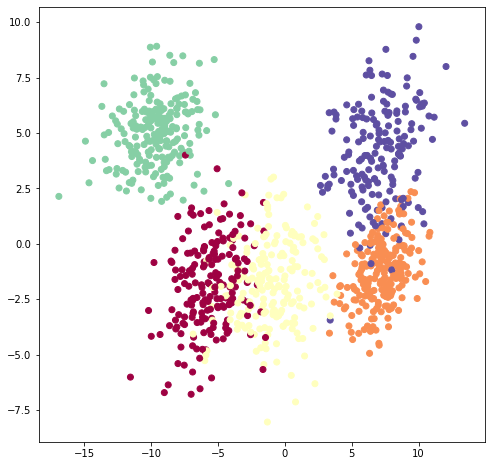

In [19]:
X, y = QDA_toy_data(num_classes = 5, sample_size=1000)

In [20]:
class discriminant_analysis():
    def __init__(self, method):
        self.method = method
        self.centers_ = None
        self.covar_matrices_ = None
    def classes(self, y):
        classes = np.unique(y)
        self.classes_ = classes # array of class names, the index of the name corresponds to the integer representation
        Y = y.copy()
        # change class names/labels to integers
        for c, k in zip(classes, range(len(self.classes_))):
            for i in range(len(y)):
                if Y[i] == c:
                    Y[i] = k
        self.Y = np.array(Y)
        return self
    def fit(self, X,y): # fit both QDA and LDA
        self.classes(y)
        centers = []
        covar_matrices = []
        for i in range(len(self.classes_)):
            centers.append(np.mean(X[self.Y==i],axis=0))
            covar_matrices.append(np.cov(X[self.Y==i].T))
        self.centers_ = centers
        self.covar_matrices_ = covar_matrices
        self.priors_ = np.bincount(self.Y)/len(y)
        M = self.covar_matrices_[0]
        for S in self.covar_matrices_[1:]:
            M += S
        self.covar_matrix_ = M/(X.shape[0] - len(self.classes_))
        return self
    def predict_qda(self, X):
        self.method = 'qda'
        if self.centers_ == None:
            print('Error: Fit the model first')
        D = []
        for i in range(len(self.centers_)):
            d = []
            S = self.covar_matrices_[i]
            S_inv = np.linalg.inv(self.covar_matrices_[i])
            mu = self.centers_[i]
            for j in range(X.shape[0]):
                d.append(-0.5*np.log(np.linalg.det(S)) -0.5*(X[j]-mu)@S_inv@(X[j]-mu)+ np.log(self.priors_[i]))
            D.append(np.array(d))
        D = np.array(D).T
        return np.argmax(D, axis=1)  
    def predict_lda(self, X):
        self.method = 'lda'
        if self.centers_ == None:
            print('Error: Fit the model first')
        D = []
        S_inv = np.linalg.inv(self.covar_matrix_)
        for i in range(len(self.centers_)):
            d = []
            mu = self.centers_[i]
            for j in range(X.shape[0]):
                d.append(X[j]@S_inv@mu -0.5*mu@S_inv@mu+ np.log(self.priors_[i]))
            D.append(np.array(d))
        D = np.array(D).T
        return np.argmax(D, axis=1)
    def predict(self, X):
        if self.method == 'qda':
            return self.predict_qda(X)
        elif self.method == 'lda':
            return self.predict_lda(X)
        else:
            print('Invalid method')

In [21]:
qda = discriminant_analysis(method='qda').fit(X,y)

In [22]:
def plot_decision_regions(model, X, y):
    xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100),
                     np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid)
    plt.figure(figsize=(8,8))
    plt.scatter(x=grid[:,0], y=grid[:,1], c=preds, s=0.1, cmap='Spectral')
    plt.scatter(x=X[:,0], y=X[:,1],c=y, cmap='Spectral')
    plt.show()
    plt.close()   

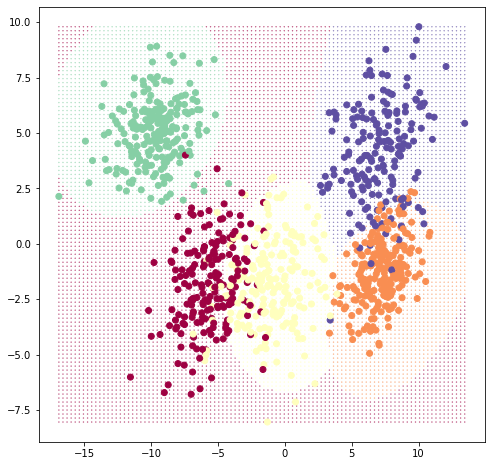

In [23]:
plot_decision_regions(qda, X,y)

# Linear Discriminant Analysis

A simpler scenario is one in which we assume that the classes share a common covariance matrix $\Sigma$. As above, the discriminant function for a particular class $k$ is

$$\delta_k(x) = \log(\pi_k) -\frac{1}{2} (x-\mu_k)^T \Sigma^{-1} (x-\mu_k)-\frac{1}{2}\log|\Sigma| $$

where instead of having a covariance matrix $\Sigma_k$ for each class, we assume that all classes have $\Sigma$ as their covariance matrix. The decision rule remains the same; we assign an observation $x$ to the class for which the discriminant function is the largest. Note that all discriminant functions have the terms $\frac{1}{2}\log|\Sigma|$ and $x^T\Sigma x$, so we can drop these terms from the discriminant functions without changing the decision rule. The simplified discriminant functions are

$$\delta_k(x) = \log(\pi_k) -\frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + x^T\Sigma^{-1}\mu_k $$

The MLE of $\pi_k$ and $\mu_k$ remain the same. The MLE for $\Sigma$ is 

$$ \hat{\Sigma} = \displaystyle\frac{\displaystyle\sum_{c=1}^C \displaystyle\sum_{i, y_i=c} (x_i - \hat{\mu_i})(x_i - \hat{\mu_i})^T}{N-C}$$

The resulting decision boundaries are linear.


In [24]:
lda = discriminant_analysis(method='lda').fit(X,y)

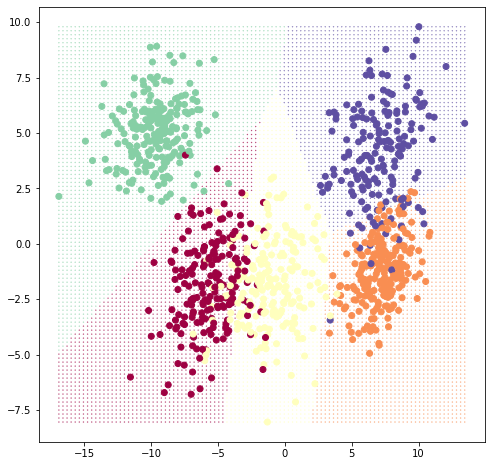

In [25]:
plot_decision_regions(lda, X,y)